In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/abdulssekyanzi/EDA Dataset.csv/100.csv')
print(df.head()) 



   Unnamed: 0    time_ms   MLII     V5
0           0   0.000000 -0.145 -0.065
1           1   2.777778 -0.145 -0.065
2           2   5.555556 -0.145 -0.065
3           3   8.333333 -0.145 -0.065
4           4  11.111111 -0.145 -0.065


In [2]:
def load_and_preprocess_data(file_path, synthetic_labels=False):
    """
    Load and preprocess the MIT-BIH Arrhythmia Dataset from a CSV file.
    Optionally generate synthetic labels for testing purposes.
    """
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Drop unnecessary columns
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    
    # Extract features (ECG signals)
    X = df[['MLII', 'V5']].values  # Features: MLII and V5
    
    # Handle labels
    if 'label' in df.columns:
        y = df['label'].values  # Use existing labels if available
    elif synthetic_labels:
        print("Generating synthetic labels for testing purposes...")
        y = np.random.randint(0, 5, size=len(X))  # Generate random labels (0 to 4)
    else:
        raise ValueError("The dataset does not contain a 'label' column. Please ensure labels are included.")
    
    # Encode categorical labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)  # Encode labels into integers
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features (standardize to zero mean and unit variance)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test, label_encoder.classes_

In [3]:
# Step 2: Train a Random Forest Classifier
def train_random_forest(X_train, y_train, n_estimators=100, max_depth=None):
    """
    Train a Random Forest classifier on the dataset.
    """
    print("Training the Random Forest Classifier...")
    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    
    # Train the model
    rf_model.fit(X_train, y_train)
    
    return rf_model



In [4]:
# Step 3: Evaluate the Model
def evaluate_model(rf_model, X_test, y_test):
    """
    Evaluate the performance of the Random Forest model.
    """
    print("Evaluating the Random Forest Model...")
    # Make predictions
    y_pred = rf_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Print confusion matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



In [5]:
# Step 4: Feature Importance Analysis
def analyze_feature_importance(rf_model, feature_names):
    """
    Analyze and visualize feature importance from the Random Forest model.
    """
    print("Analyzing Feature Importance...")
    # Get feature importances
    importances = rf_model.feature_importances_
    
    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    # Print feature importance
    print("\nFeature Importance:")
    print(feature_importance_df)
    
    # Plot feature importance
    plt.figure(figsize=(8, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Analysis')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()



Generating synthetic labels for testing purposes...
Training the Random Forest Classifier...
Evaluating the Random Forest Model...
Test Accuracy: 0.1984

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.20      0.20     25694
           1       0.20      0.21      0.20     25838
           2       0.20      0.20      0.20     26127
           3       0.20      0.18      0.19     26150
           4       0.20      0.20      0.20     26191

    accuracy                           0.20    130000
   macro avg       0.20      0.20      0.20    130000
weighted avg       0.20      0.20      0.20    130000


Confusion Matrix:
[[5231 5209 5214 4924 5116]
 [5294 5305 5173 4825 5241]
 [5321 5350 5300 4897 5259]
 [5476 5267 5360 4805 5242]
 [5331 5487 5292 4930 5151]]
Analyzing Feature Importance...

Feature Importance:
  Feature  Importance
1      V5    0.522781
0    MLII    0.477219


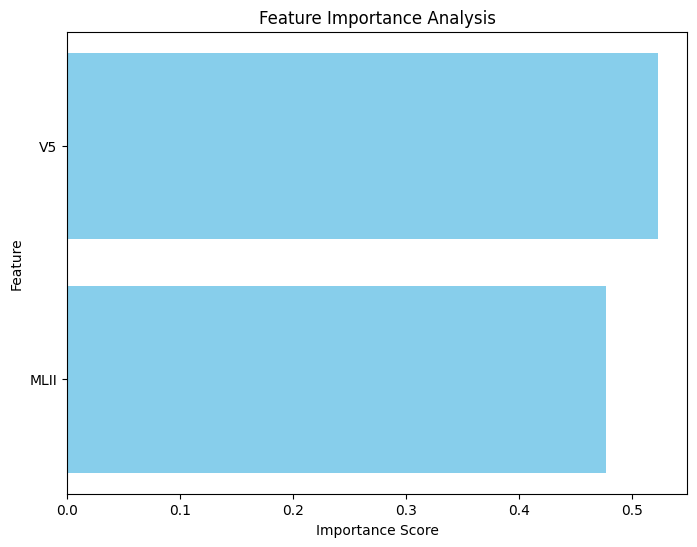

In [6]:
# Step 5: Main Execution
if __name__ == "__main__":
    # Load and preprocess the dataset
   file_path = "C:/Users/abdulssekyanzi/EDA Dataset.csv/100.csv"  # Replace with your dataset path
X_train, X_test, y_train, y_test, class_names = load_and_preprocess_data(file_path, synthetic_labels=True)

# Train the Random Forest model
rf_model = train_random_forest(X_train, y_train, n_estimators=100, max_depth=None)

# Evaluate the model
evaluate_model(rf_model, X_test, y_test)

# Analyze feature importance
feature_names = ['MLII', 'V5']  # Replace with actual feature names if different
analyze_feature_importance(rf_model, feature_names)